In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

(clt-monte-carlo)=
# Quantifying Epistemic Uncertainty in Monte Carlo Estimates

We now show how to quantify the epistemic uncertainty of Monte Carlo estimates using the CLT.
Remember that we are working with an expectation of the form:

$$
I = \mathbb{E}[g(X)]=\int g(x) p(x) dx,
$$

where $X\sim p(x)$ and $g(x)$ is a function of $x$.
Our sampling-based approximation starts by taking $X_1, X_2,\dots$ be independent copies of $X$.
Then, it uses the random variables $Y_1 = g(X_1), Y_2 = g(X_2), \dots$, which are also independent and identically distributed.
Invoking the strong law of large states, we saw that the sampling average of the $Y_i$'s converges to their mean:

$$
\bar{I}_N=\frac{g(X_1)+\dots+g(X_N)}{N}=\frac{Y_1+\dots+Y_N}{N}\rightarrow I,\;\text{a.s.}
$$

Note that the variables $Y_i = g(X_i)$ are independent identical distributed with mean:

$$
\mathbb{E}[Y_i] = \mathbb{E}[g(X_i)] = I.
$$

Assume that their variance is finite, i.e.,

$$
\mathbb{V}[Y_i] = \sigma^2 < +\infty.
$$

Yes, a random variable can have an infinite variance.
The CLT would not work in that case.
Okay. If the variance of the $Y_i$'s is indeed finite, the CLT applies for them, and you get that their sampling average $\bar{I}_N$ becomes approximately normally distributed for large $N$, i.e.,

$$
\bar{I}_N \sim N\left(I, \frac{\sigma^2}{N}\right),
$$

for large $N$.
Now, we may rewrite this equation as follows:

$$
\bar{I}_N = I + \frac{\sigma}{\sqrt{N}}Z,
$$

where $Z\sim N(0,1)$ is a standard normal, recall [Lecture 4](lecture04).
It's like saying $I_N$ is $I$ plus some zero mean noise with a given variance.
But it is not ad hoc; this is precisely what the CLT says.
Now take this equation and solve for $I$:

$$
I = \bar{I}_N - \frac{\sigma}{\sqrt{N}}Z.
$$

This says that the actual value of the expectation $I$ is $I_N$ minus some zero mean noise with a given variance.
Going back to distributions:

$$
I \sim N\left(\bar{I}_N, \frac{\sigma^2}{N}\right),
$$

where the minus sign disappears because $Z$ and $-Z$ have the same distribution (standard normal).
We are after this expression, except we need to know what $ \sigma^2 $ is.
Well, let's approximate it also with a sampling average!
We did this already in [Lecture 8](lecture08).
Set:

$$
\bar{\sigma}_N^2 = \frac{1}{N}\sum_{j=1}^Ng^2(X_j) - \bar{I}_N^2.
$$

Now we can say that:

$$
I \sim N\left(\bar{I}_N, \frac{\bar{\sigma}^2_N}{N}\right).
$$

It would help if you kept in mind that this is only valid for large $N$.

It is also possible to get a predictive interval.
We can write something like:

$$
I \approx \bar{I}_N \pm \frac{2}{\sqrt{N}}\bar{\sigma}_N,
$$

with (about) $95\%$ probability.

Alright, let's see this in practice.

(100,)
[0.27929013 0.58330982 0.38911186 0.57394839 0.85614101 0.76735425
 0.65817086 0.59584672 0.62325706 0.62331938 0.59973358 0.5701337
 0.70694977 0.8252974  0.78499798 0.74098801 0.75247521 0.71620549
 0.799404   0.93441992 0.89456416 0.89165541 0.85288884 0.81739974
 0.82855242 0.87175264 0.94644474 0.91871906 0.89056009 0.93616325
 0.9145711  0.88665984 0.8925751  0.87452206 0.95337856 0.93205605
 0.93385071 0.91565368 0.89347809 0.90549903 0.90650019 0.91241483
 0.92497862 0.93767598 0.95481768 0.955223   0.93672408 0.93156898
 0.9125912  0.89475709 0.89097263 0.90758376 0.91175053 0.89778489
 0.89017426 0.87573348 0.86154469 0.85281719 0.8390279  0.82520906
 0.83076616 0.83384199 0.82746738 0.81577641 0.8054977  0.81044749
 0.82260602 0.81193675 0.8002419  0.79063408 0.78343599 0.82571741
 0.830392   0.82183962 0.82042149 0.83859076 0.86149233 0.85044963
 0.84311338 0.88041356 0.86962535 0.86420774 0.88603189 0.8754913
 0.86629792 0.88057202 0.88618033 0.8773367  0.89526666 0

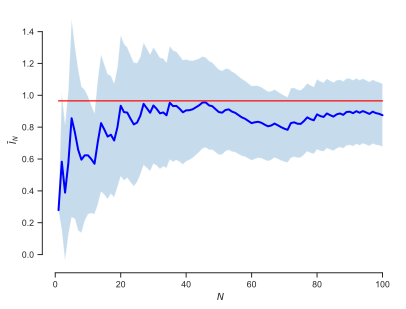

In [ ]:
# The function of x we would like to consider
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Number of samples to take
N = 100

# Generate samples from X
x_samples = np.random.rand(N)

# Get the corresponding Y's
y_samples = g(x_samples)
print(y_samples.shape)

# Evaluate the sample average for all sample sizes 
I_running = np.cumsum(y_samples) / np.arange(1, N + 1)

# Evaluate the sample average for the squared of Y
g2_running = np.cumsum(y_samples ** 2) / np.arange(1, N + 1)

# Evaluate the running average of the variance
sigma2_running = g2_running - I_running ** 2

# Alright, now we have quantified our uncertainty about I for every N
# from a single MC run. Let's plot a (about) 95% predictive interval
# Running lower bound for the predictive interval
I_lower_running = (
    I_running - 2.0 * np.sqrt(sigma2_running / np.arange(1, N + 1))
)

# Running upper bound for the predictive interval
I_upper_running = (
    I_running + 2.0 * np.sqrt(sigma2_running / np.arange(1, N + 1))
)

# A common plot for all estimates
fig, ax = plt.subplots()
# Shaded area for the interval
ax.fill_between(
    np.arange(1, N + 1),
    I_lower_running,
    I_upper_running,
    alpha=0.25
)
# Here is the MC estimate:
ax.plot(np.arange(1, N+1), I_running, 'b', lw=2)
# The true value
ax.plot(np.arange(1, N+1), [0.965] * N, color='r')
# and the labels
ax.set_xlabel('$N$')
ax.set_ylabel(r'$\bar{I}_N$')
sns.despine(trim=True);
plt.show()

## Questions

+ Increase ``N`` until you get an answer close enough to the correct answer (the red line). Notice how the epistemic error bars shrink around the actual value.